In [26]:
import pandas as pd
import os 

def procesar_datos(csv_file):
    # Cargar los datos del CSV
    data = pd.read_csv(csv_file)

    # Seleccionar columnas relevantes
    columnas_interes = ['PROVINCIA', 'MUNICIPI', 'CODI_CONTAMINANT', 'ANY', 'MES', 'DIA'] + \
                       [f'H{i:02d}' for i in range(1, 25)]
    data = data[columnas_interes]

    # Calcular la media diaria para las horas
    columnas_horas = [f'H{i:02d}' for i in range(1, 25)]
    data['Media_dia'] = data[columnas_horas].mean(axis=1)

    # Filtrar contaminantes peligrosos
    contaminants_perillosos = [1, 8, 9, 10, 14]
    data = data[data['CODI_CONTAMINANT'].isin(contaminants_perillosos)]

    # Agrupar por provincia, municipio, contaminante, año y mes, y calcular la media mensual
    resumen = data.groupby(
        ['PROVINCIA', 'MUNICIPI', 'CODI_CONTAMINANT', 'ANY', 'MES'], as_index=False
    )['Media_dia'].mean()

    # Renombrar columna para mayor claridad
    resumen.rename(columns={'Media_dia': 'Media_mes'}, inplace=True)

    return resumen

# Lista de carpetas o directorios con archivos CSV por año
carpetas_años = ["Contaminants_20","Contaminants_21","Contaminants_22","Contaminants_23", "Contaminants_24"]  # Cambia estas rutas según tus carpetas

# Diccionario para almacenar resultados por año
resultados_totales = []

for carpeta in carpetas_años:
    archivos_csv = [os.path.join(carpeta, archivo) for archivo in os.listdir(carpeta) if archivo.endswith('.csv')]
    for archivo in archivos_csv:
        df_resultado = procesar_datos(archivo)
        resultados_totales.append(df_resultado)

# Concatenar todos los DataFrames en uno solo
df_completo = pd.concat(resultados_totales, ignore_index=True)

# Agrupar por 'CODI_CONTAMINANT', 'ANY', 'PROVINCIA' y 'MUNICIPI', calculando la media de 'Media_mes'
df_anual = df_completo.groupby(['PROVINCIA', 'MUNICIPI', 'CODI_CONTAMINANT', 'ANY'], as_index=False)['Media_mes'].mean()

# Renombrar columna para mayor claridad
df_anual.rename(columns={'Media_mes': 'Media_anual'}, inplace=True)

# Exportar a CSV (opcional)
df_anual.to_csv("Resumen_Anual_Contaminants.csv", index=False)

# Mostrar el resultado final
df_anual

,PROVINCIA,MUNICIPI,CODI_CONTAMINANT,ANY,Media_anual
0,Barcelona,Barcelona,1,2020,1.379921
1,Barcelona,Barcelona,1,2021,1.383170
2,Barcelona,Barcelona,1,2022,1.895239
3,Barcelona,Barcelona,1,2023,1.874395
4,Barcelona,Barcelona,1,2024,1.854312
5,Barcelona,Barcelona,8,2020,24.040008
6,Barcelona,Barcelona,8,2021,23.585301
7,Barcelona,Barcelona,8,2022,26.625439
8,Barcelona,Barcelona,8,2023,22.604879
9,Barcelona,Barcelona,8,2024,21.447528


In [44]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

def procesar_datos(csv_file):
    # Cargar los datos del CSV
    data = pd.read_csv(csv_file)

    # Seleccionar columnas relevantes
    columnas_interes = ['PROVINCIA', 'MUNICIPI', 'CODI_CONTAMINANT', 'ANY', 'MES', 'DIA'] + \
                       [f'H{i:02d}' for i in range(1, 25)]
    data = data[columnas_interes]

    # Calcular la media diaria para las horas
    columnas_horas = [f'H{i:02d}' for i in range(1, 25)]
    data['Media_dia'] = data[columnas_horas].mean(axis=1)

    # Filtrar contaminantes peligrosos
    contaminants_perillosos = [1, 8, 9, 10, 14]
    data = data[data['CODI_CONTAMINANT'].isin(contaminants_perillosos)]

    # Agrupar por provincia, municipio, contaminante, año y mes, y calcular estadísticas avanzadas
    resumen = data.groupby(
        ['PROVINCIA', 'MUNICIPI', 'CODI_CONTAMINANT', 'ANY', 'MES'], as_index=False
    )['Media_dia'].agg(
        Media=('mean'),
        Mediana=('median'),
        Desviacion_Estandar=('std'),
        Min=('min'),
        Max=('max'),
        Percentil_25=(lambda x: x.quantile(0.25)),
        Percentil_75=(lambda x: x.quantile(0.75)),
        Rango_Intercuartilico=(lambda x: x.quantile(0.75) - x.quantile(0.25))
    )

    return resumen

# Lista de carpetas o directorios con archivos CSV por año
carpetas_años = ["Contaminants_20","Contaminants_21","Contaminants_22","Contaminants_23", "Contaminants_24"]  # Cambia estas rutas según tus carpetas

# Lista para almacenar resultados por cada archivo
resultados_totales = []

for carpeta in carpetas_años:
    archivos_csv = [os.path.join(carpeta, archivo) for archivo in os.listdir(carpeta) if archivo.endswith('.csv')]
    for archivo in archivos_csv:
        df_resultado = procesar_datos(archivo)
        resultados_totales.append(df_resultado)

# Concatenar todos los DataFrames en uno solo
df_completo = pd.concat(resultados_totales, ignore_index=True)

# Agrupar por 'CODI_CONTAMINANT', 'ANY', 'PROVINCIA' y 'MUNICIPI', calculando estadísticas anuales avanzadas
df_global = df_completo.groupby(
    ['PROVINCIA', 'MUNICIPI', 'CODI_CONTAMINANT', 'ANY'], as_index=False
).agg(
    Media_Anual=('Media', 'mean'),
    Mediana_Anual=('Mediana', 'mean'),
    Desviacion_Estandar_Anual=('Desviacion_Estandar', 'mean'),
    Min_Anual=('Min', 'min'),
    Max_Anual=('Max', 'max'),
    Percentil_25_Anual=('Percentil_25', 'mean'),
    Percentil_75_Anual=('Percentil_75', 'mean'),
    Rango_Intercuartilico_Anual=('Rango_Intercuartilico', 'mean')
)

# Exportar a CSV (opcional)
df_global.to_csv("Resumen_Estadistico_Global_Contaminants.csv", index=False)

# Mostrar el resultado final
df_global

,PROVINCIA,MUNICIPI,CODI_CONTAMINANT,ANY,Media_Anual,Mediana_Anual,Desviacion_Estandar_Anual,Min_Anual,Max_Anual,Percentil_25_Anual,Percentil_75_Anual,Rango_Intercuartilico_Anual
0,Barcelona,Barcelona,1,2020,1.379921,1.122214,0.603738,1.000000,9.347826,1.007246,1.521470,0.514223
1,Barcelona,Barcelona,1,2021,1.383170,1.179016,0.512075,1.000000,5.428571,1.010719,1.577435,0.566716
2,Barcelona,Barcelona,1,2022,1.895239,1.678819,0.854267,0.543077,7.666667,1.158681,2.462586,1.303905
3,Barcelona,Barcelona,1,2023,1.874395,1.719369,0.938326,1.000000,15.000000,1.170188,2.265633,1.095445
4,Barcelona,Barcelona,1,2024,1.854312,1.774892,0.800092,1.000000,5.333333,1.120400,2.392326,1.271925
5,Barcelona,Barcelona,8,2020,24.040008,22.674894,12.876544,1.000000,83.714286,14.303578,32.318927,18.015349
6,Barcelona,Barcelona,8,2021,23.585301,22.296995,12.193222,1.875000,86.333333,14.142047,31.095773,16.953726
7,Barcelona,Barcelona,8,2022,26.625439,25.379464,13.592347,1.666667,84.500000,16.674851,35.105035,18.430184
8,Barcelona,Barcelona,8,2023,22.604879,20.982955,12.018723,1.041667,113.400000,13.521149,30.054340,16.533191
9,Barcelona,Barcelona,8,2024,21.447528,20.055748,11.353803,1.000000,77.041667,12.838727,28.529442,15.690715


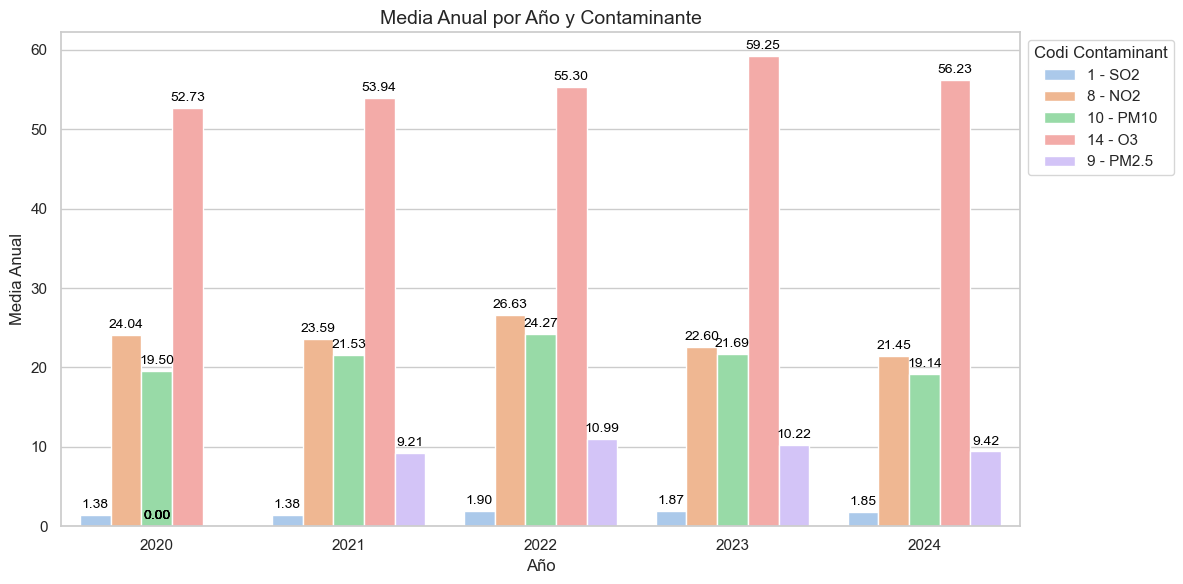

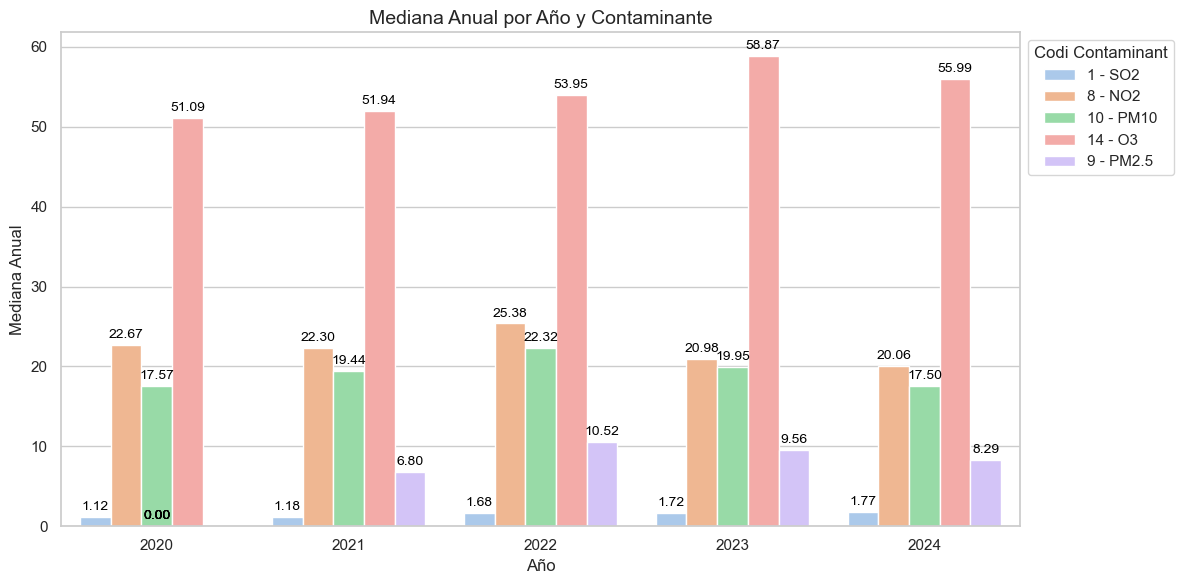

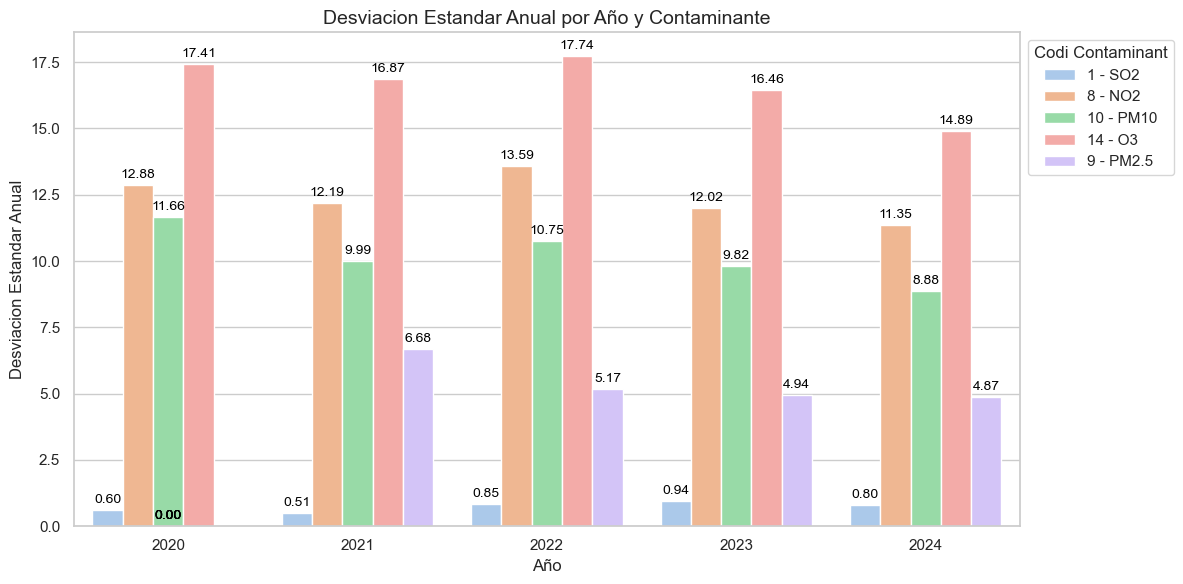

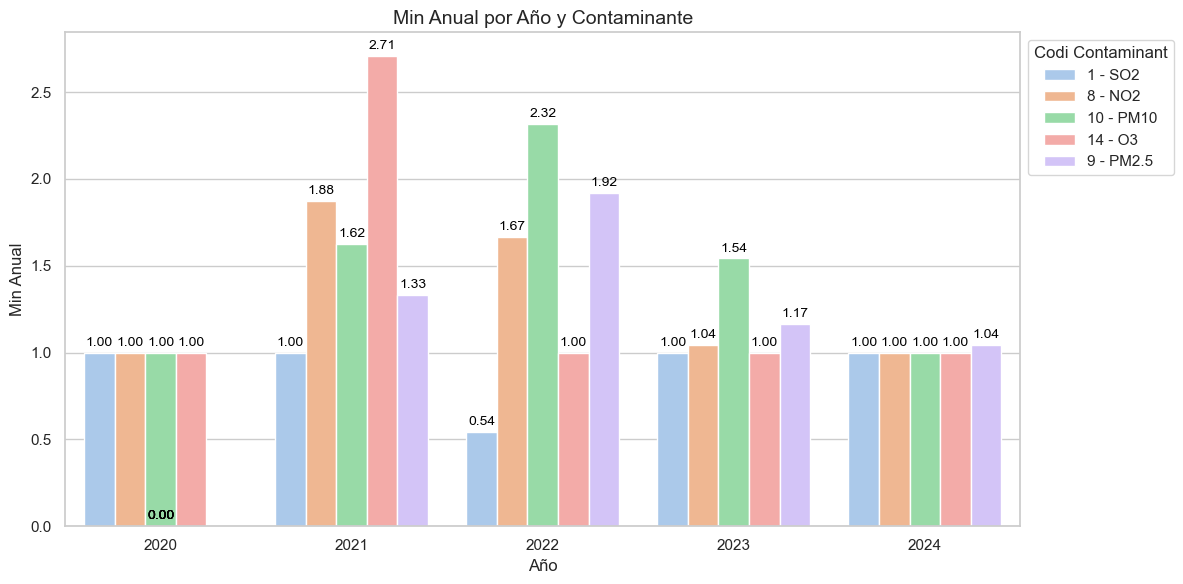

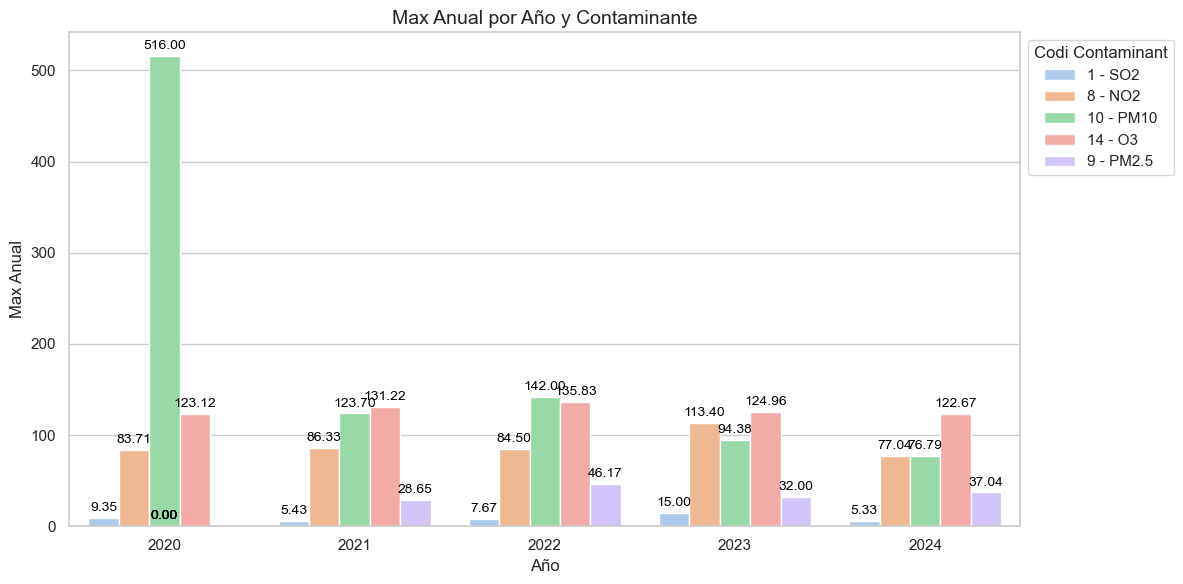

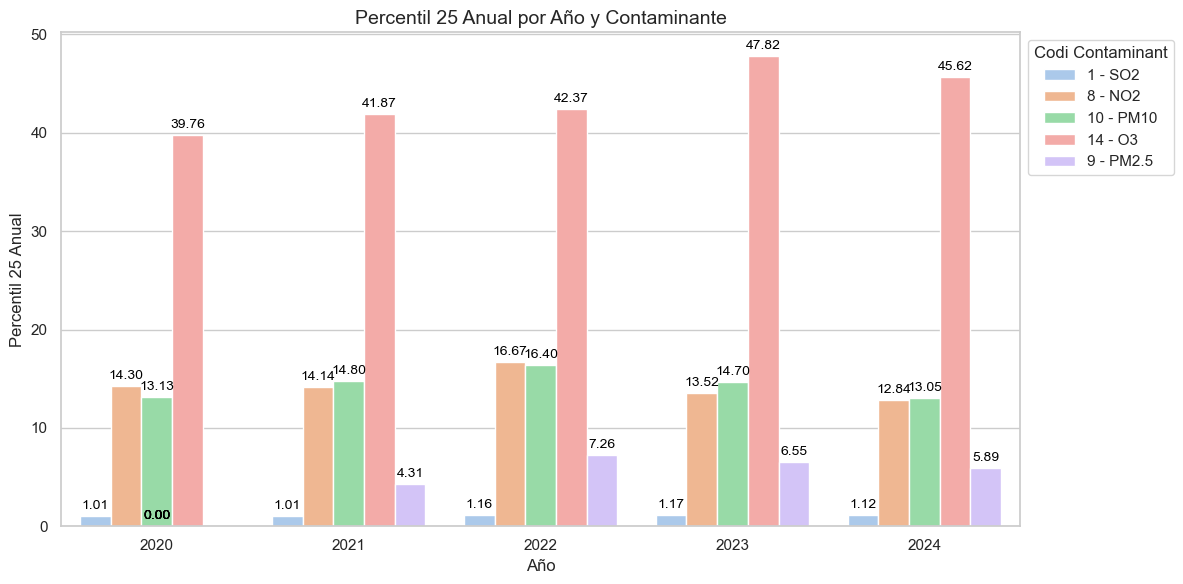

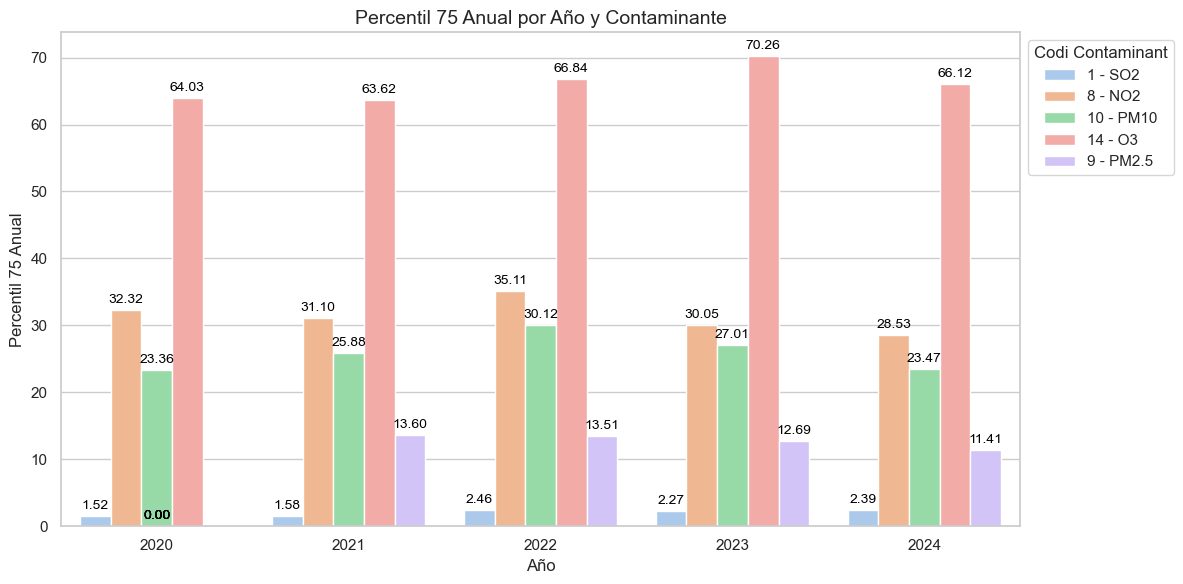

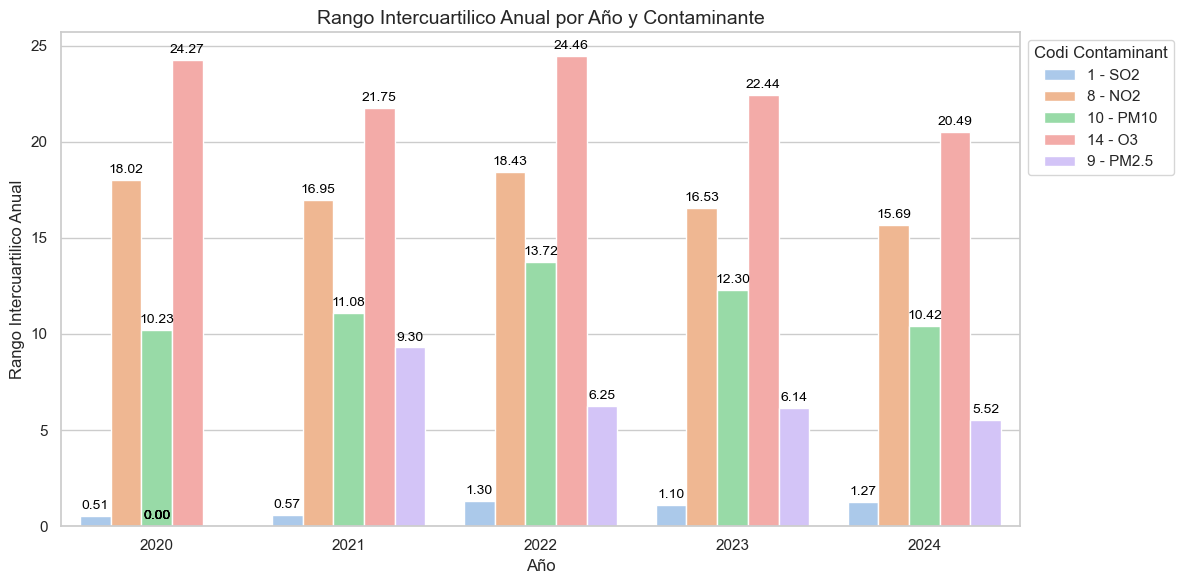

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_global['CODI_CONTAMINANT'] = df_global['CODI_CONTAMINANT'].replace(1, '1 - SO2')
df_global['CODI_CONTAMINANT'] = df_global['CODI_CONTAMINANT'].replace(8, '8 - NO2')
df_global['CODI_CONTAMINANT'] = df_global['CODI_CONTAMINANT'].replace(9, '9 - PM2.5')
df_global['CODI_CONTAMINANT'] = df_global['CODI_CONTAMINANT'].replace(10, '10 - PM10')
df_global['CODI_CONTAMINANT'] = df_global['CODI_CONTAMINANT'].replace(14, '14 - O3')

# Configuración global de estilo
sns.set(style="whitegrid")
plt.rcParams.update({'figure.autolayout': True})

# Función para añadir etiquetas encima de las barras
def agregar_valores_barras(ax):
    for p in ax.patches:
        ax.annotate(
            f'{p.get_height():.2f}', 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha='center', va='baseline', 
            fontsize=10, color='black', 
            xytext=(0, 5), textcoords='offset points'
        )

# Parámetros de interés
parametros = [
    'Media_Anual', 'Mediana_Anual', 'Desviacion_Estandar_Anual', 
    'Min_Anual', 'Max_Anual', 'Percentil_25_Anual', 
    'Percentil_75_Anual', 'Rango_Intercuartilico_Anual'
]

# Crear un gráfico para cada parámetro
for parametro in parametros:
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        data=df_global, 
        x='ANY', y=parametro, hue='CODI_CONTAMINANT', 
        palette='pastel'
    )
    agregar_valores_barras(ax)
    ax.set_title(f'{parametro.replace("_", " ")} por Año y Contaminante', fontsize=14)
    ax.set_xlabel('Año', fontsize=12)
    ax.set_ylabel(parametro.replace("_", " "), fontsize=12)
    ax.legend(title='Codi Contaminant', loc='upper left', bbox_to_anchor=(1, 1))
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

#### 